In [1]:
import pandas as pd
import numpy as np
import matplotlib as py
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv("HR_comma_sep.csv")

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**All columns contain no null values and there are 5 qualitative and 5 quantitative variables.**

In [9]:
peopleLeft = df[df['left'] == 1]
peopleLeft.shape

(3571, 10)

In [10]:
peopleStay = df[df['left'] == 0]
peopleStay.shape

(11428, 10)

In [11]:
import seaborn as sb

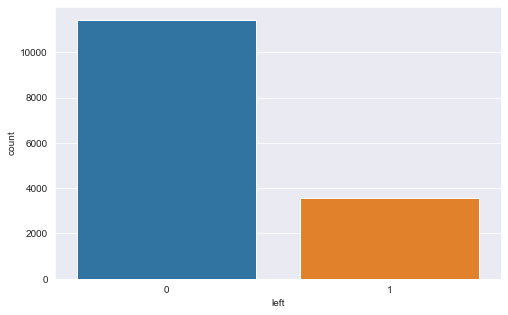

In [12]:
sb.countplot(x = 'left' , data = df)

**Most employees tend to stay with the company.**

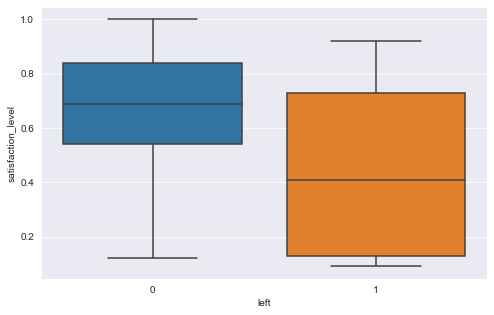

In [15]:
sb.boxplot(x = 'left', y = 'satisfaction_level', data = df)

**Employees that stay with the company tend to have a higher statisfcation rating.**

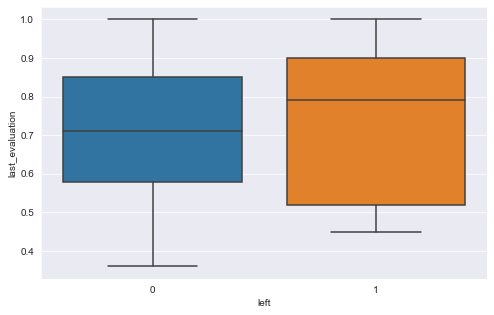

In [16]:
sb.boxplot(x = 'left', y = 'last_evaluation', data = df)

**Employees that left tend to have a higher last evaluation.**

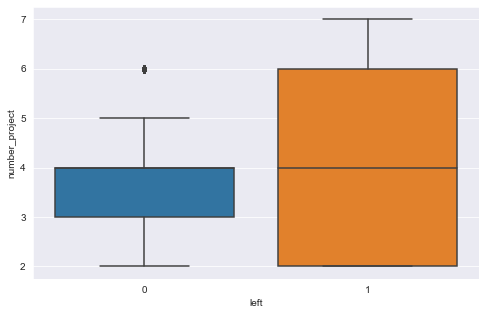

In [17]:
sb.boxplot(x = 'left', y = 'number_project', data = df)

**Employees that left tend to have a higher number of projects.**

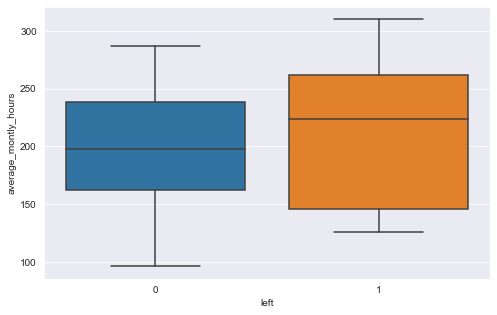

In [18]:
sb.boxplot(x = 'left', y = 'average_montly_hours', data = df)

**Employees that left on average had a higher average montly hours.**

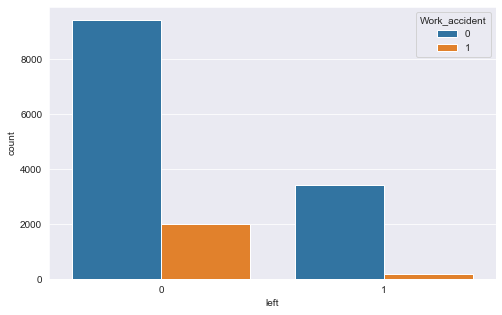

In [19]:
sb.countplot(x = 'left' , data = df, hue = 'Work_accident')

**Majority of employees that had a accident stayed at their jobs.**

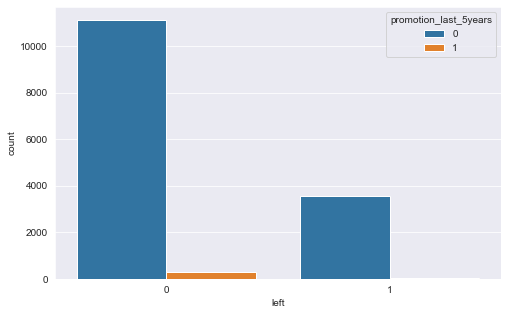

In [20]:
sb.countplot(x = 'left' , data = df, hue = 'promotion_last_5years')

**All the people that left did not receive a promotion.**

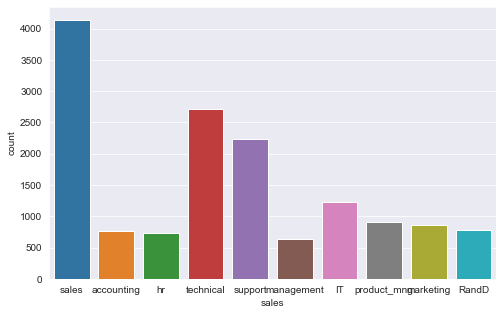

In [21]:
sb.countplot(x = 'sales', data = df)

**Majority of employees are in sales or technical.**

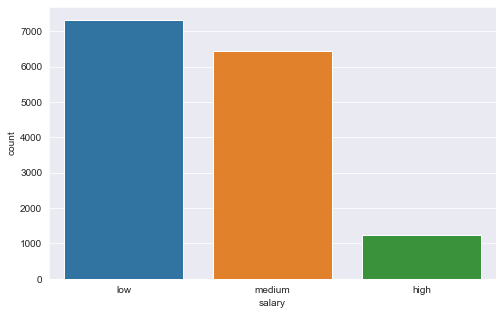

In [22]:
sb.countplot(x = 'salary', data = df)

**Majority of workers are low salary.**

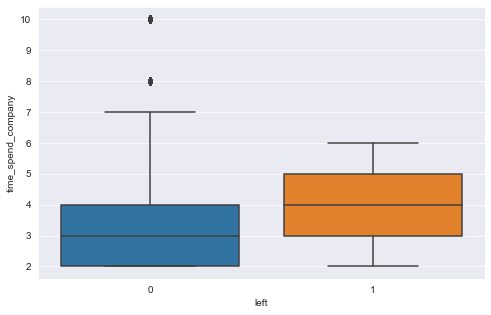

In [24]:
sb.boxplot(x = 'left', y = 'time_spend_company', data = df)

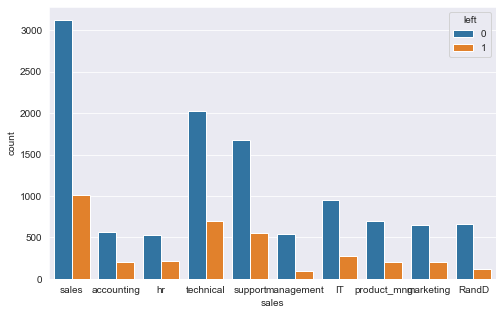

In [26]:
sb.countplot(x = 'sales', hue = 'left', data = df)

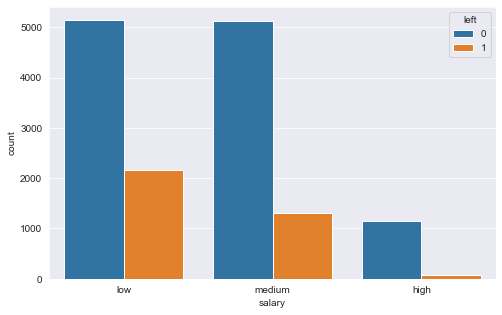

In [27]:
sb.countplot(x = 'salary', hue = 'left', data = df)

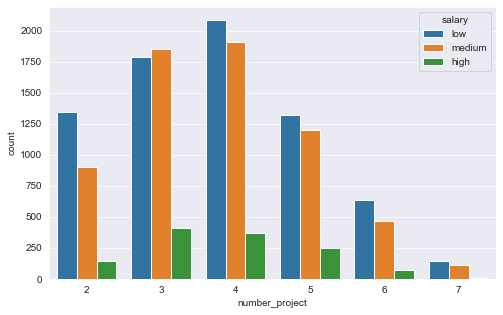

In [31]:
sb.countplot(x = 'number_project', hue = 'salary', data =df)

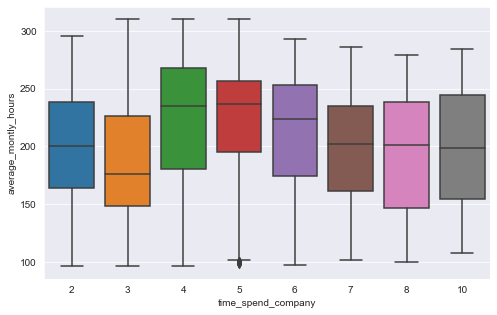

In [32]:
sb.boxplot(x = 'time_spend_company', y = 'average_montly_hours', data = df)

**Employees that have been at the company 4-6 years tend to average the most hours. Also the majority of employees that left were in sales and had low salaries.**

In [33]:
from sklearn.linear_model import LogisticRegression

In [39]:
df = pd.get_dummies(df)
X = df.drop(['left'] , axis = 1)
Y = df['left']

In [49]:
from sklearn.preprocessing import StandardScaler

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
lr = LogisticRegression()

In [53]:
lr.fit(X_train, y_train)

/Users/devinkulatunga/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
predictions = lr.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.786


**I implemented a logistic regression model for predicting 'left' in which I improved the accuracy by using the StandardScaler and creating dummy variables**